In [24]:
import matplotlib.pyplot as plt
import numpy as np
import os
import joblib
from skimage.io import imread
data_n = []
person_number = []
current_path = 'G:/computer_vision_lab/lab_2/neutral'
counter = 0
for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    person_number.append(file[1:4])
                    im = imread(current_path+'/'+file, as_gray=True)# read image # read image
                    im_crop = im[230:450,50:250]
                    data_n.append(im_crop)
                    counter = counter + 1


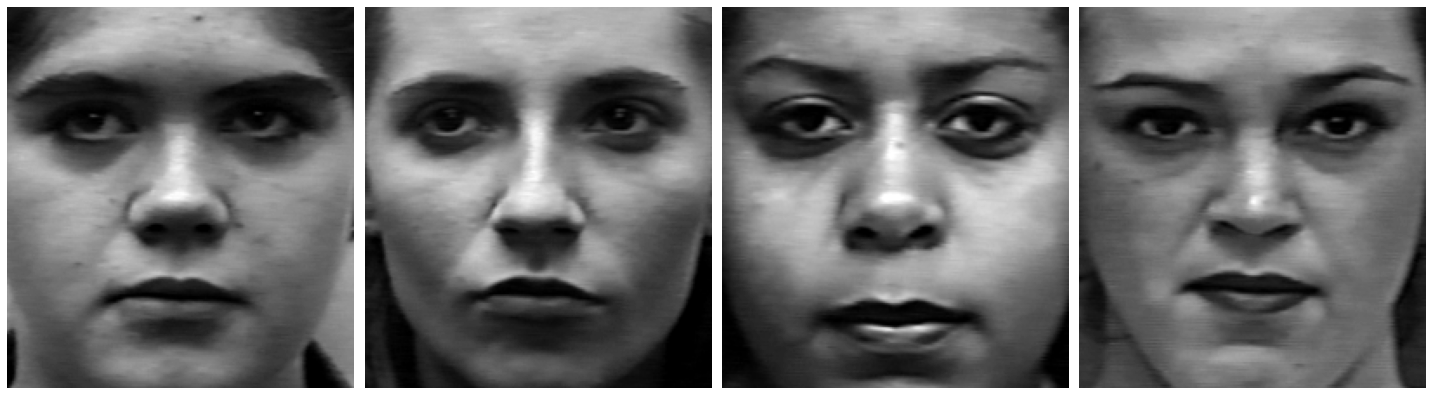

In [25]:
n1,n2 = np.shape(im_crop)
unique_person = np.unique(person_number)
# creating mask 
mask = np.zeros((n1,n2))
for i in range(n1):
    for j in range (n2):
        if ((i - 340)**2)/(120**2) + ((j - 150)**2)/(100**2) < 1:
            mask[i,j] = 1

im_matrix_n = np.zeros((n1*n2,counter))
for i in range(counter):
    im_matrix_n[:,i] = np.reshape(data_n[i],(n1*n2,))
countern = counter
chosen_idx = [2,4,6,8]
fig, axes = plt.subplots(1, 4, figsize=(20, 20))
ax = axes.ravel()
im_counter = 0
for i in chosen_idx:
    ax[im_counter].imshow(np.reshape(im_matrix_n[:,i],(n1,n2)), cmap=plt.cm.gray)
    ax[im_counter].axis('off')
    im_counter = im_counter +1
fig.tight_layout()
plt.show()

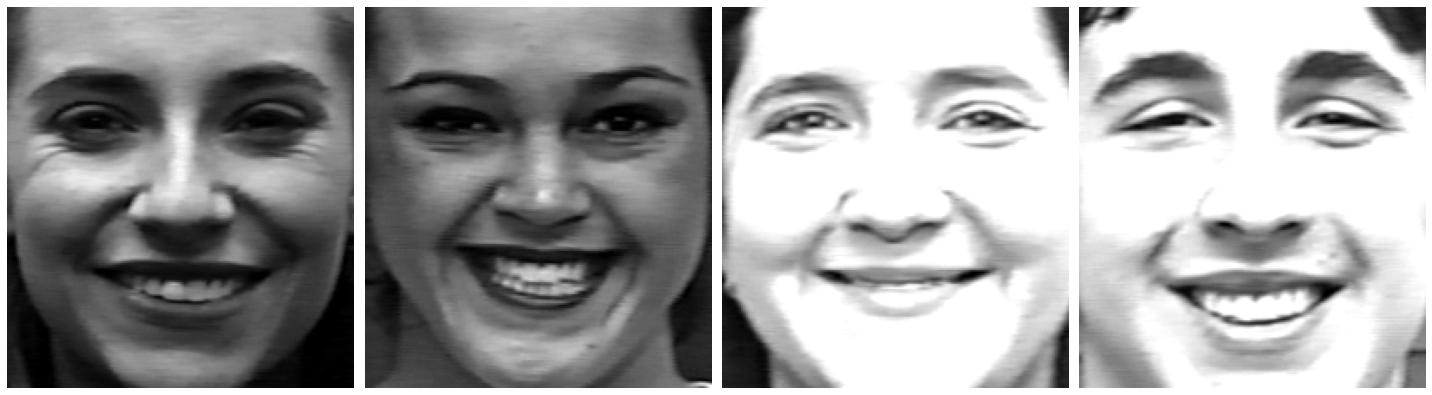

In [26]:
# for happy face
data_h = []
person_number = []
current_path = 'G:/computer_vision_lab/lab_2/happy'
counter = 0
for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    person_number.append(file[1:4])
                    im = imread(current_path+'/'+file, as_gray=True)# read image # read image
                    im_crop = im[230:450,50:250]
                    data_h.append(im_crop)
                    counter = counter + 1
counterh = counter
im_matrix_h = np.zeros((n1*n2,counter))
for i in range(counter):
    im_matrix_h[:,i] = np.reshape(data_h[i],(n1*n2,))
chosen_idx = [2,4,6,8]
fig, axes = plt.subplots(1, 4, figsize=(20, 20))
ax = axes.ravel()
im_counter = 0
for i in chosen_idx:
    ax[im_counter].imshow(np.reshape(im_matrix_h[:,i],(n1,n2)), cmap=plt.cm.gray)
    ax[im_counter].axis('off')
    im_counter = im_counter +1
fig.tight_layout()
plt.show()

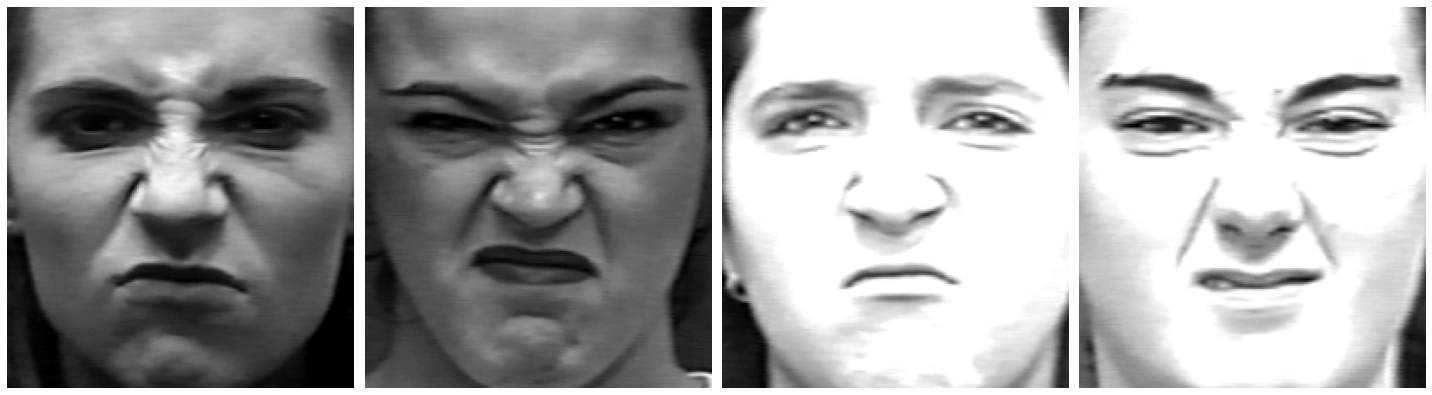

In [27]:
# for disgust face
data_d = []
person_number = []
current_path = 'G:/computer_vision_lab/lab_2/disgust'
counter = 0
for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    person_number.append(file[1:4])
                    im = imread(current_path+'/'+file, as_gray=True)# read image # read image
                    im_crop = im[230:450,50:250]
                    data_d.append(im_crop)
                    counter = counter + 1
counterd = counter
im_matrix_d = np.zeros((n1*n2,counter))
for i in range(counter):
    im_matrix_d[:,i] = np.reshape(data_d[i],(n1*n2,))
chosen_idx = [2,4,6,8]
fig, axes = plt.subplots(1, 4, figsize=(20, 20))
ax = axes.ravel()
im_counter = 0
for i in chosen_idx:
    ax[im_counter].imshow(np.reshape(im_matrix_d[:,i],(n1,n2)), cmap=plt.cm.gray)
    ax[im_counter].axis('off')
    im_counter = im_counter +1
fig.tight_layout()
plt.show()

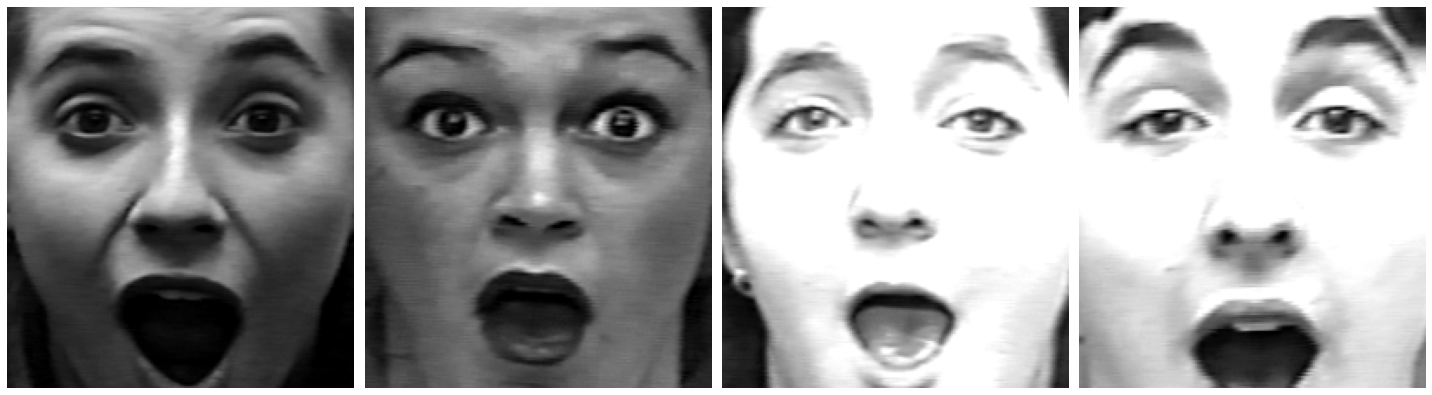

In [28]:
# for surprised image
data_s = []
person_number = []
current_path = 'G:/computer_vision_lab/lab_2/surprise'
counter = 0
for file in os.listdir(current_path):
                if file[-3:] in {'jpg', 'png'}:
                    person_number.append(file[1:4])
                    im = imread(current_path+'/'+file, as_gray=True)# read image # read image
                    im_crop = im[230:450,50:250]
                    data_s.append(im_crop)
                    counter = counter + 1
counters = counter
im_matrix_s = np.zeros((n1*n2,counter))
for i in range(counter):
    im_matrix_s[:,i] = np.reshape(data_s[i],(n1*n2,))
chosen_idx = [2,4,6,8]
fig, axes = plt.subplots(1, 4, figsize=(20, 20))
ax = axes.ravel()
im_counter = 0
for i in chosen_idx:
    ax[im_counter].imshow(np.reshape(im_matrix_s[:,i],(n1,n2)), cmap=plt.cm.gray)
    ax[im_counter].axis('off')
    im_counter = im_counter +1
fig.tight_layout()
plt.show()

In [29]:
from random import shuffle
happy_index = np.array(list(range( counterh)))
shuffle(happy_index)
surprise_index = np.array(list(range( counters)))
shuffle(surprise_index)
disgust_index = np.array(list(range( counterd)))
shuffle(disgust_index)
neutural_index = np.array(list(range( countern)))
shuffle(neutural_index)

برای ساخت رندوم لیستی به طول تصاویر مختلف ساخته و شافل میکنیم و بخش ابتدایی را برای اموزش و داده های باقیمانده برای تست انتخاب میشوند.

In [30]:
train_img = np.zeros((n1*n2,120+60+60+30))
ytrain = np.zeros((120+60+60+30,))
train_img[:,0:120] =  im_matrix_n[:,neutural_index[0:120]]
train_img[:,120:120+60] =  im_matrix_h[:,happy_index[0:60]]
train_img[:,120+60:120+60+60] =  im_matrix_s[:,surprise_index[0:60]]
train_img[:,120+60+60:120+60+60+30] =  im_matrix_d[:,disgust_index[0:30]]

ytrain[0:120] = 1
ytrain[120:120+60] = 2
ytrain[120+60:120+60+60] = 3
ytrain[120+60+60:120+60+60+30] = 4
test_img = np.zeros((n1*n2,counters+counterh+countern+counterd - (120+60+60+30)))
ytest = np.zeros((counters+counterh+counterd+countern - (120+60+60+30),))


test_img[:,0:countern-120] = im_matrix_n[:,neutural_index[120:countern]]
ytest[0:countern-120]   = 1
test_img[:,countern-120:countern-120 + counterh - 60] = im_matrix_h[:,happy_index[60:counterh]]
ytest[countern-120:countern-120 + counterh - 60]   = 2
test_img[:,countern-120 + counterh - 60:countern-120 + counterh - 60 + counters-60] = im_matrix_s[:,surprise_index[60:counters]]
ytest[countern-120 + counterh - 60:countern-120 + counterh - 60 + counters-60]   = 3
test_img[:,countern-120 + counterh - 60 + counters-60:countern-120 + counterh - 60 + counters-60 + counterd - 30] = im_matrix_d[:,disgust_index[30:counterd]]
ytest[countern-120 + counterh - 60 + counters-60:countern-120 + counterh - 60 + counters-60 + counterd - 30]   = 4

حال پایه تبدیل پی سی ای را پیدا کرده و سپس روی تصاویر تست و ترین با پایه یکسانی که روی ترین بدست آورده ایم انرا اعمال میکنیم

In [31]:
from sklearn.decomposition import PCA
train_img = train_img.T
test_img = test_img.T
perm = np.random.permutation(len(train_img))
train_img = train_img[perm]
ytrain = ytrain[perm]
pca = PCA(n_components=20, svd_solver='auto', whiten=True).fit(train_img) 
transformed_train = pca.transform(train_img) 
transformed_test = pca.transform(test_img) 


In [32]:
np.shape(transformed_test)

(140, 20)

In [33]:
np.shape(ytrain)

(270,)

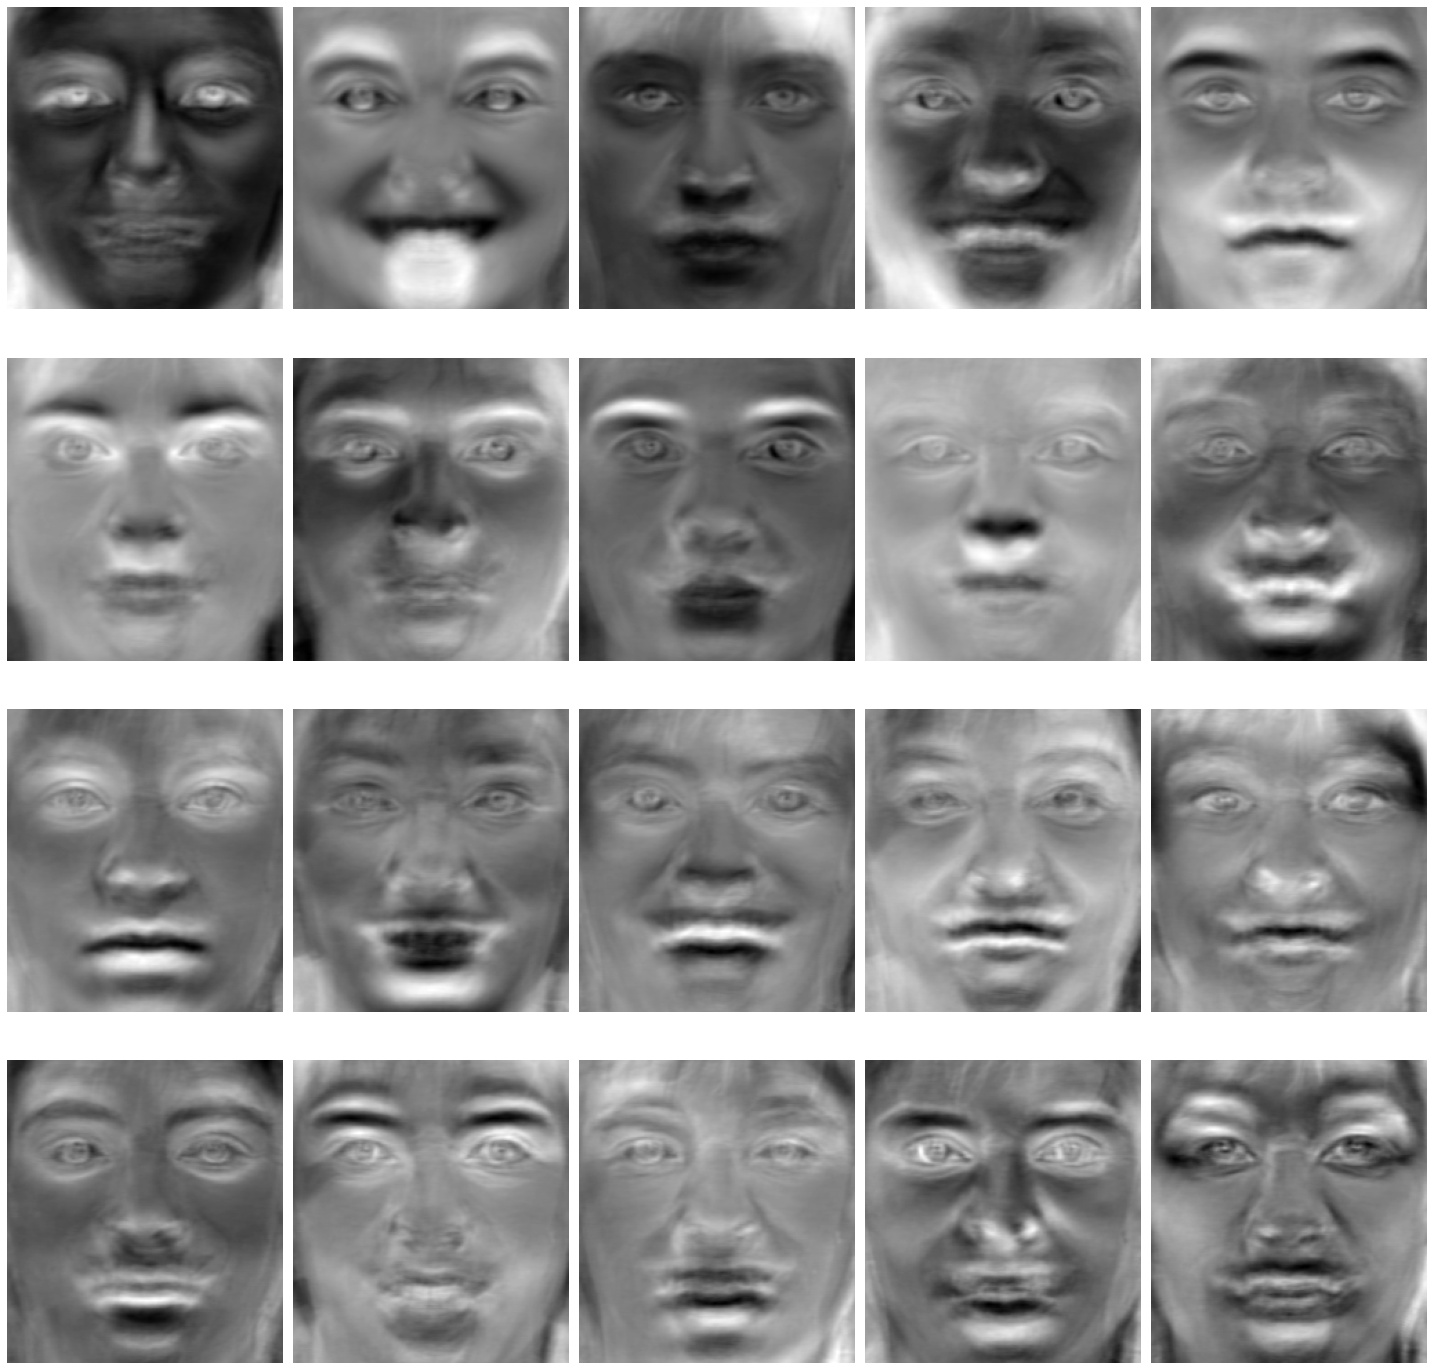

In [34]:
train_img = train_img.T
m = np.mean(train_img,1)
A = np.zeros(np.shape(train_img))
for i in range(train_img.shape[1]):
    A[:,i] = train_img[:,i] - m
C_t = np.matmul(np.transpose(A),A)
eigenValues, eigenVectors = np.linalg.eig(C_t)
n = 50
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]
eigenVectors = eigenVectors[:,0:n]
eigenVectors = np.matmul(A,eigenVectors)
fig, axes = plt.subplots(4, 5, figsize=(20, 20))
ax = axes.ravel()
for i in range(n):
    eigenVectors[:,i] = eigenVectors[:,i]/np.linalg.norm(eigenVectors[:,i])
    if i < 20:
        ax[i].imshow(np.reshape(eigenVectors[:,i],(n1,n2)), cmap=plt.cm.gray)
        ax[i].axis('off')
fig.tight_layout()
plt.show()


In [35]:
pca_test = np.zeros((n1*n2,counters+countern+counterd+counterh - 120 - 60 - 60 - 30))
At = np.zeros((n1*n2,counters+countern+counterd+counterh - 120 - 60 - 60 - 30))
test_img = test_img.T
for i in range(counters+countern+counterd+counterh - 120 - 60 - 60 - 30):
    At[:,i] = test_img[:,i] - m
pca_train_feature = np.matmul(np.transpose(eigenVectors),A)
pca_train_feature = pca_train_feature.T
pca_test_feature = np.matmul(np.transpose(eigenVectors),At)
pca_test_feature = pca_test_feature.T

In [36]:
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
kf = KFold(n_splits=5,shuffle = True)
score = 0
for train_index, test_index in kf.split(ytrain):
    a = train_index
a

array([  0,   2,   3,   4,   5,   6,   8,   9,  10,  12,  13,  14,  16,
        17,  19,  20,  21,  22,  24,  26,  27,  28,  31,  32,  33,  34,
        35,  40,  41,  42,  43,  44,  46,  47,  48,  50,  51,  52,  53,
        54,  55,  57,  59,  62,  63,  64,  66,  67,  69,  70,  71,  74,
        75,  76,  77,  78,  79,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 119, 120, 121, 122, 123, 124, 125, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 138, 139, 141, 142, 143, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 155, 156, 157, 158, 159, 162, 163,
       164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 175, 176, 178,
       179, 180, 181, 183, 185, 186, 187, 188, 189, 190, 191, 192, 194,
       195, 197, 198, 199, 201, 202, 203, 204, 205, 206, 207, 209, 210,
       211, 212, 213, 214, 216, 217, 218, 219, 221, 223, 224, 22

In [37]:
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

c_vec = np.array([100,10,2,1,0.05,20 ,0.1, 0.01,0.001,0.0001])
acc_vec = np.zeros((10,))
X = np.array(transformed_train)
X = X.T
counter = 0
y = ytrain
for i in c_vec:
    kf = KFold(n_splits=5,shuffle = True)
    score = 0
    for train_index, test_index in kf.split(ytrain):
        clf = (svm.SVC(C = i, kernel = 'linear'))
        Xt = X[:,train_index]
        yt = y[train_index]
        Xte = X[:,test_index]
        yte = y[test_index]
        clf.fit(Xt.T,yt)
        predict = clf.predict(Xte.T)
        score = score + accuracy_score(yte,predict)
    acc_vec[counter] = score/5
    counter = counter + 1
index  = np.where(np.max(acc_vec) == acc_vec)
c_final = c_vec[index]
c_final = c_final[0]


برای بررسی و پیدا کردن بهترین "سی" از کراس ولیدیشن استفاده میکنیم برای این کار از متد 5 فولد استفاده میکنیم که داده درواقع به 5 قسمت تقسیم میشود و هردفعه 4 قسمت انتخاب شده و با انها اموزش داده میشود و سپس روی بخش اخر صحت به عنوان امتیاز در نظر گرفته میشود بخشی که بتواند بیشترین امتیاز را در اینچا بدست بیاورد به عنوان سی نهایی انتخاب میشود و سپس با سی انتخاب شده روی کل داه ترین اموزش را انجام میدهیم و نتیجه تست را گزارش میکنیم

In [38]:
c_final

0.05

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
clf = OneVsRestClassifier(svm.SVC(C = c_final, kernel = 'linear'))
Xt = X[:,:]
clf.fit(X.T,ytrain)
predict = clf.predict(transformed_test)
print('confusion matrix = ')
print(confusion_matrix(ytest,predict))
print('accuracy for test = ')
print(accuracy_score(ytest,predict))
print('precision = ')
print(precision_score(ytest,predict,average = 'weighted'))
print('recall = ')
print(recall_score(ytest,predict,average = 'weighted'))
print('accuracy for train = ')
print(accuracy_score(ytrain,clf.predict(transformed_train)))


confusion matrix = 
[[68  2  0  0]
 [ 4 21  0  0]
 [ 0  0 28  0]
 [ 4  3  0 10]]
accuracy for test = 
0.9071428571428571
precision = 
0.9130277617119723
recall = 
0.9071428571428571
accuracy for test = 
0.9333333333333333


همانطور که در بالا مشاهده میکنیم داده به صورت کلی تر داده های کلاس یک به خوبی تشخیص داده میشنود و بعد سه و بعد دو که با توجه به اندازه داده های ترین قابل انتظار میباشد و 
دقت ترین و تست حدودا در یک اردر میباشند
اگر بخواهیم با روش های پیشین مقایسه کنیم ما با حالتی که ورودی 20 ویژگی است ( از 20 پایه پی سی ای  استفاده کرده ایم) نتیجه بهترین شده است ( دقت گذشته با این ویژگی در حد 0.87 درصد بوده است) و حتی اکر از پایه های بیشتر استفاده کنیم برتری ان بیشتر نیز معلوم میشود دلیل این امر تنظیم پارامتر سی است چون ما قبلا مدل خطی داشته ایم ولی طرز بهینه سازی مربوطه باعث میشود که بتوانیم طبقه بند بهتری داشته باشیم.


# for kernel = rbf

حال در اینجا بخش ترین را با دستور گرید سرچ بهینه میکنیم تا بهترین پارامتر ها را به ما بدهد

In [40]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[100,10,2,1,0.05,20 ,0.1, 0.01,0.001,0.0001],'gamma':[0.1,0.001,0.01,0.05,1,2,5,10,20,100]}
svc = (svm.SVC(kernel = 'rbf'))
clf = GridSearchCV(svc, parameters)
clf.fit(transformed_train, ytrain)
clf.best_params_

{'C': 100, 'gamma': 0.001}

In [42]:
predict = clf.predict(transformed_test)
print('confusion matrix = ')
print(confusion_matrix(ytest,predict))
print('accuracy for test = ')
print(accuracy_score(ytest,predict))

print('precision = ')
print(precision_score(ytest,predict,average = 'weighted'))
print('recall = ')
print(recall_score(ytest,predict,average = 'weighted'))
print('accuracy for train = ')
print(accuracy_score(ytrain,clf.predict(transformed_train)))

confusion matrix = 
[[69  0  1  0]
 [ 2 21  0  2]
 [ 1  0 26  1]
 [ 3  2  0 12]]
accuracy for test = 
0.9142857142857143
precision = 
0.9127789279963193
recall = 
0.9142857142857143
accuracy for train = 
0.9518518518518518


مشاهده میشود که نسبت به حالت خطی بهتر شده است دلیل این میباشد در واقع ما کرنل اردر بالاتر استفاده کرده ایم پس حداقل روی ترین بهتر شدن مورد انتظار است ولی به خاطر اینکه ما محدوده وسیعی از پارامتر ها را بررسی کرده ایم در این حالت باز توانسته ایم روی تست هم نتیجه مناسبی داشته باشیم و افزایش دقت را مشاهده میکنیم